## Introduction

The structure of NetworkX can be seen by the organization of its source code.
The package provides classes for graph objects, generators to create standard
graphs, IO routines for reading in existing datasets, algorithms to analyze
the resulting networks and some basic drawing tools.

Most of the NetworkX API is provided by functions which take a graph object
as an argument.  Methods of the graph object are limited to basic manipulation
and reporting.  This provides modularity of code and documentation.
It also makes it easier for newcomers to learn about the package in stages.
The source code for each module is meant to be easy to read and reading
this Python code is actually a good way to learn more about network algorithms,
but we have put a lot of effort into making the documentation sufficient and friendly.
If you have suggestions or questions please contact us by joining the
[NetworkX Google group](http://groups.google.com/group/networkx-discuss).

Classes are named using `CamelCase` (capital letters at the start of each word).
functions, methods and variable names are `lower_case_underscore` (lowercase with
an underscore representing a space between words).

### NetworkX Basics

After starting Python, import the networkx module with (the recommended way)

In [1]:
import networkx as nx

To save repetition, in the documentation we assume that
NetworkX has been imported this way.

If importing networkx fails, it means that Python cannot find the installed
module. Check your installation and your `PYTHONPATH`.

The following basic graph types are provided as Python classes:

`Graph`

:   This class implements an undirected graph. It ignores
    multiple edges between two nodes.  It does allow self-loop
    edges between a node and itself.

`DiGraph`

:   Directed graphs, that is, graphs with directed edges.
    Provides operations common to directed graphs,
    (a subclass of Graph).

`MultiGraph`

:   A flexible graph class that allows multiple undirected edges between
    pairs of nodes.  The additional flexibility leads to some degradation
    in performance, though usually not significant.

`MultiDiGraph`

:   A directed version of a MultiGraph.

Empty graph-like objects are created with

In [2]:
G = nx.Graph()
G = nx.DiGraph()
G = nx.MultiGraph()
G = nx.MultiDiGraph()

All graph classes allow any [hashable](https://docs.python.org/3/glossary.html#term-hashable) object as a node.
Hashable objects include strings, tuples, integers, and more.
Arbitrary edge attributes such as weights and labels
can be associated with an edge.

The graph internal data structures are based on an
adjacency list representation and implemented using
Python dictionary datastructures.
The graph adjacency structure is
implemented as a Python dictionary of
dictionaries; the outer dictionary is keyed by nodes to values that are
themselves dictionaries keyed by neighboring node to the
edge attributes associated with that edge.  This “dict-of-dicts” structure
allows fast addition, deletion, and lookup of nodes and neighbors in
large graphs.  The underlying datastructure is accessed directly
by methods (the programming interface “API”) in the class definitions.
All functions, on the other hand, manipulate graph-like objects
solely via those API methods and not by acting directly on the datastructure.
This design allows for possible replacement of the ‘dicts-of-dicts’-based
datastructure with an alternative datastructure that implements the
same methods.

# Graphs

The first choice to be made when using NetworkX is what type of graph
object to use.  A graph (network) is a collection of nodes together
with a collection of edges that are pairs of nodes.  Attributes are
often associated with nodes and/or edges.  NetworkX graph objects come in
different flavors depending on two main properties of the network:

> * Directed: Are the edges **directed**?  Does the order of the edge
>   pairs $(u, v)$ matter?  A directed graph is specified by the “Di”
>   prefix in the class name, e.g. `DiGraph()`.  We make this distinction
>   because many classical graph properties are defined differently for
>   directed graphs.

> * Multi-edges: Are multiple edges allowed between each pair of nodes?
>   As you might imagine, multiple edges requires a different data
>   structure, though clever users could design edge data attributes to
>   support this functionality.  We provide a standard data structure
>   and interface for this type of graph using the prefix “Multi”,
>   e.g., `MultiGraph()`.

The basic graph classes are named:
Graph,
DiGraph,
MultiGraph, and
MultiDiGraph

## Nodes and Edges

The next choice you have to make when specifying a graph is what kinds
of nodes and edges to use.

If the topology of the network is all you
care about then using integers or strings as the nodes makes sense and
you need not worry about edge data.  If you have a data structure
already in place to describe nodes you can simply use that structure
as your nodes provided it is [hashable](https://docs.python.org/3/glossary.html#term-hashable).  If it is not hashable you can
use a unique identifier to represent the node and assign the data
as a node attribute.

Edges often have data associated with them.  Arbitrary data
can be associated with edges as an edge attribute.
If the data is numeric and the intent is to represent
a *weighted* graph then use the ‘weight’ keyword for the attribute.
Some of the graph algorithms, such as
Dijkstra’s shortest path algorithm, use this attribute
name by default to get the weight for each edge.

Attributes can be assigned to an edge by using keyword/value
pairs when adding edges.  You can use any keyword
to name your attribute and can then query the edge
data using that attribute keyword.

Once you’ve decided how to encode the nodes and edges, and whether you have
an undirected/directed graph with or without multiedges you are ready to build
your network.

# Graph Creation

NetworkX graph objects can be created in one of three ways:

* Graph generators—standard algorithms to create network topologies.

* Importing data from pre-existing (usually file) sources.

* Adding edges and nodes explicitly.

Explicit addition and removal of nodes/edges is the easiest to describe.
Each graph object supplies methods to manipulate the graph.  For example,

In [3]:
import networkx as nx
G = nx.Graph()
G.add_edge(1, 2)  # default edge data=1
G.add_edge(2, 3, weight=0.9)  # specify edge data

Edge attributes can be anything:

In [4]:
import math
G.add_edge('y', 'x', function=math.cos)
G.add_node(math.cos)  # any hashable can be a node

You can add many edges at one time:

In [5]:
elist = [(1, 2), (2, 3), (1, 4), (4, 2)]
G.add_edges_from(elist)
elist = [('a', 'b', 5.0), ('b', 'c', 3.0), ('a', 'c', 1.0), ('c', 'd', 7.3)]
G.add_weighted_edges_from(elist)

See the Tutorial for more examples.

Some basic graph operations such as union and intersection
are described in the operators module documentation.

Graph generators such as `binomial_graph()`
and `erdos_renyi_graph()` are
provided in the graph generators subpackage.

For importing network data from formats such as GML, GraphML, edge list text files
see the reading and writing graphs subpackage.

# Graph Reporting

Class views provide basic reporting of nodes, neighbors, edges and degree.
These views provide iteration over the properties as well as membership
queries and data attribute lookup. The views refer to the graph data structure
so changes to the graph are reflected in the views. This is analogous to
dictionary views in Python 3. If you want to change the graph while iterating
you will need to use e.g. `for e in list(G.edges):`. The views provide
set-like operations, e.g. union and intersection, as well as dict-like
lookup and iteration of the data attributes using `G.edges[u, v]['color']`
and `for e, datadict in G.edges.items():`. Methods `G.edges.items()` and
`G.edges.values()` are familiar from python dicts. In addition `G.edges.data()`
provides specific attribute iteration e.g. `for e, e_color in G.edges.data('color'):`.

The basic graph relationship of an edge can be obtained in two ways.
One can look for neighbors of a node or one can look for edges.
We jokingly refer to people who focus on nodes/neighbors as node-centric
and people who focus on edges as edge-centric.  The designers of NetworkX
tend to be node-centric and view edges as a relationship between nodes.
You can see this by our choice of lookup notation like `G[u]` providing neighbors
(adjacency) while edge lookup is `G.edges[u, v]`.
Most data structures for sparse graphs are essentially adjacency lists and so
fit this perspective. In the end, of course, it doesn’t really matter which way
you examine the graph. `G.edges` removes duplicate representations of undirected
edges while neighbor reporting across all nodes will naturally report both directions.

Any properties that are more complicated than edges, neighbors and degree are
provided by functions.  For example `nx.triangles(G, n)` gives the number of triangles
which include node n as a vertex.  These functions are grouped in the code and
documentation under the term algorithms.

# Algorithms

A number of graph algorithms are provided with NetworkX.
These include shortest path, and breadth first search
(see traversal),
clustering and isomorphism algorithms and others.  There are
many that we have not developed yet too.  If you implement a
graph algorithm that might be useful for others please let
us know through the
[NetworkX Google group](http://groups.google.com/group/networkx-discuss)
or the Github [Developer Zone](https://github.com/networkx/networkx).

As an example here is code to use Dijkstra’s algorithm to
find the shortest weighted path:

In [6]:
G = nx.Graph()
e = [('a', 'b', 0.3), ('b', 'c', 0.9), ('a', 'c', 0.5), ('c', 'd', 1.2)]
G.add_weighted_edges_from(e)
print(nx.dijkstra_path(G, 'a', 'd'))

['a', 'c', 'd']


# Drawing

While NetworkX is not designed as a network drawing tool, we provide
a simple interface to drawing packages and some simple layout algorithms.
We interface to the excellent Graphviz layout tools like dot and neato
with the (suggested) pygraphviz package or the pydot interface.
Drawing can be done using external programs or the Matplotlib Python
package.  Interactive GUI interfaces are possible, though not provided.
The drawing tools are provided in the module drawing.

The basic drawing functions essentially place the nodes on a scatterplot
using the positions you provide via a dictionary or the positions are
computed with a layout function. The edges are lines between those dots.

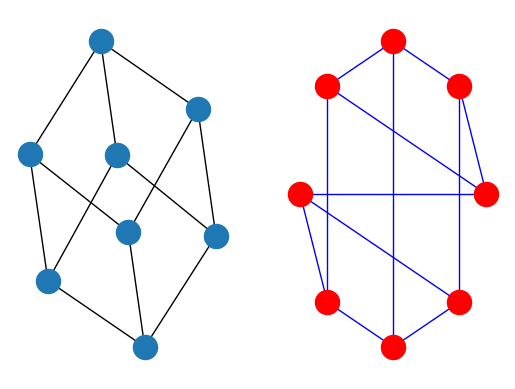

In [7]:
import matplotlib.pyplot as plt
G = nx.cubical_graph()
subax1 = plt.subplot(121)
nx.draw(G)   # default spring_layout
subax2 = plt.subplot(122)
nx.draw(G, pos=nx.circular_layout(G), node_color='r', edge_color='b')

See the examples for more ideas.

# Data Structure

NetworkX uses a “dictionary of dictionaries of dictionaries” as the
basic network data structure.  This allows fast lookup with reasonable
storage for large sparse networks.  The keys are nodes so `G[u]` returns
an adjacency dictionary keyed by neighbor to the edge attribute
dictionary. A view of the adjacency data structure is provided
by the dict-like object `G.adj` as e.g. `for node, nbrsdict in G.adj.items():`.
The expression `G[u][v]` returns the edge attribute dictionary itself.
A dictionary of lists would have also been possible, but not allow
fast edge detection nor convenient storage of edge data.

Advantages of dict-of-dicts-of-dicts data structure:

> * Find edges and remove edges with two dictionary look-ups.

> * Prefer to “lists” because of fast lookup with sparse storage.

> * Prefer to “sets” since data can be attached to edge.

> * `G[u][v]` returns the edge attribute dictionary.

> * `n in G` tests if node `n` is in graph `G`.

> * `for n in G:` iterates through the graph.

> * `for nbr in G[n]:` iterates through neighbors.

As an example, here is a representation of an undirected graph with the
edges $(A, B)$ and $(B, C)$.

In [8]:
G = nx.Graph()
G.add_edge('A', 'B')
G.add_edge('B', 'C')
print(G.adj)

{'A': {'B': {}}, 'B': {'A': {}, 'C': {}}, 'C': {'B': {}}}


The data structure gets morphed slightly for each base graph class.
For DiGraph two dict-of-dicts-of-dicts structures are provided, one
for successors (`G.succ`) and one for predecessors (`G.pred`).
For MultiGraph/MultiDiGraph we use a dict-of-dicts-of-dicts-of-dicts 
where the third dictionary is keyed by an edge key identifier to the fourth
dictionary which contains the edge attributes for that edge between
the two nodes.

Graphs provide two interfaces to the edge data attributes: adjacency
and edges. So `G[u][v]['width']` is the same as `G.edges[u, v]['width']`.

In [9]:
G = nx.Graph()
G.add_edge(1, 2, color='red', weight=0.84, size=300)
print(G[1][2]['size'])
print(G.edges[1, 2]['color'])

300
red
